## **DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

##### **IMPORT LIBRARIES**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

##### **IMPORT RAW DATA**

In [2]:
df = pd.read_csv(r"F:\Data Science\Data Analysis Projects\Capstone Project\Blinkit Sales Analysis Project\BlinkIT Grocery Data.csv")

##### **Sample Data**

In [3]:
print(df.head())

  Item Fat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Size        Outlet Type  Item Visibility  Item Weight     Sales  \
0      Medium  Supermarket Type1         0.100014        15.10  145.4786   
1      Medium  Supermarket Type2         0.008596     

##### **IMPORT LIBRARIES**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##### **Size of Data**

In [8]:
sh = df.shape
print(f"Size of Data : {sh}")
print(f"Number of Rows : {sh[0]}")
print(f"Number of Columns : {sh[1]}")

Size of Data : (8523, 12)
Number of Rows : 8523
Number of Columns : 12


##### **Field info**

In [9]:
print("Columns : ",df.columns)

Columns :  Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')


In [15]:
data_types = df.dtypes
print(f"Data Types for all the columns : \n{data_types}")

Data Types for all the columns : 
Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object



##### **Data Cleaning**

In [24]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat',
                                                         'low fat':'Low Fat',
                                                         'reg': 'Regular'})

In [25]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

##### **BUSINESS REQUIREMENTS**

##### **KPI's REQUIREMENTS**

In [ ]:
# Total Sales 
total_sales = df['Sales'].sum()

# Average sales 
average_sales = df['Sales'].mean()

# Number of Items Sold 
no_of_items_sold = df['Sales'].count()

# Average Ratings 
avg_ratings = df['Rating'].mean()

# Display

print(f"Total Sales : ${total_sales:,.0f}")
print(f"Average Sales : ${average_sales:,.0f}")
print(f"No of Items Sold : {no_of_items_sold:,.0f}")
print(f"Average Ratings : {avg_ratings:,.1f}")

Total Sales : $1,201,681
Average Sales : 141
No of Items Sold : 8,523
Average Ratings : 4.0


##### **CHARTS REQUIREMENTS**

##### **Total Sales by Fat Content**

In [44]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


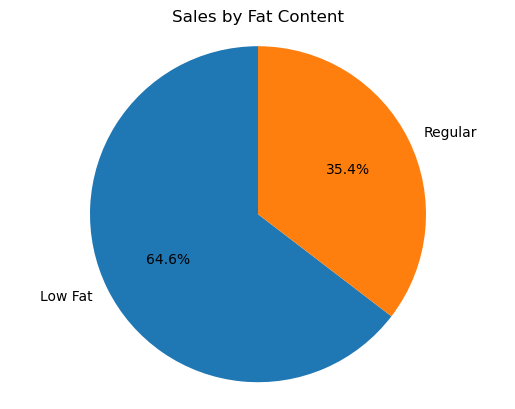

In [50]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,
                    autopct='%.1f%%',
                    startangle=90)

plt.title("Sales by Fat Content")
plt.axis('equal')
plt.show()

##### **Total Sales by Item Type**

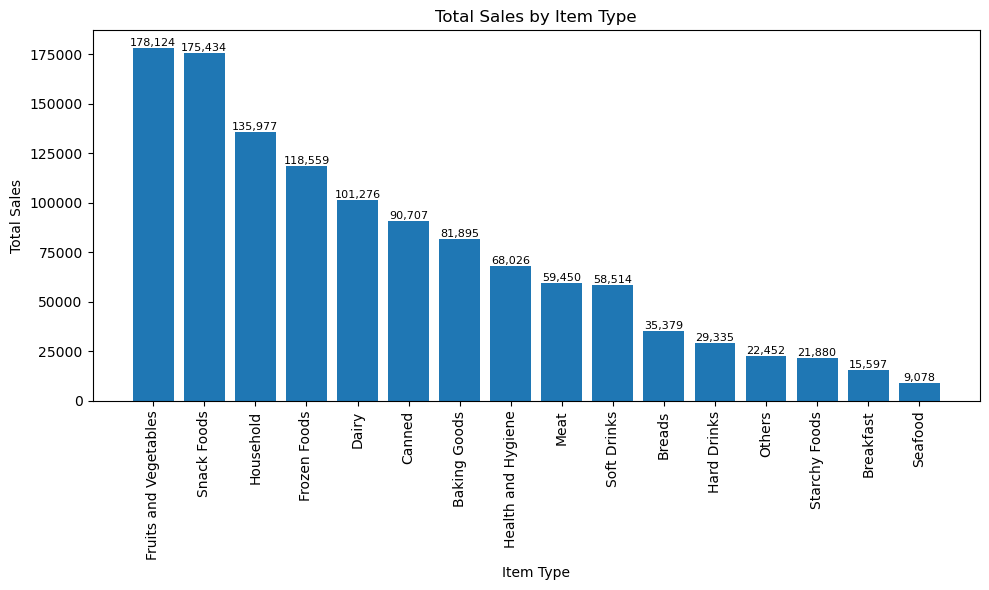

In [56]:
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_item_type.index,sales_by_item_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title("Total Sales by Item Type")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)
    
    
plt.tight_layout()
plt.show()

##### **Fat Content by Outlet for Total Sales**

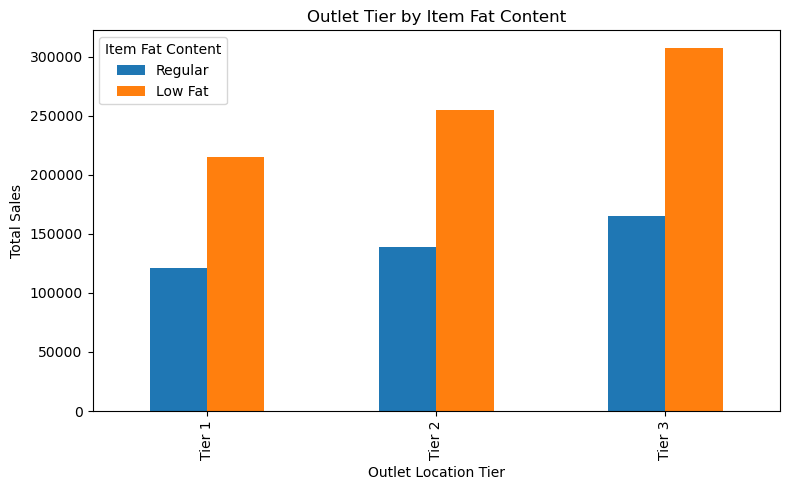

In [61]:
sales_by_outlet = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
sales_by_outlet = sales_by_outlet[['Regular','Low Fat']]

ax = sales_by_outlet.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

##### **Total Sales by Outlet Establishment**

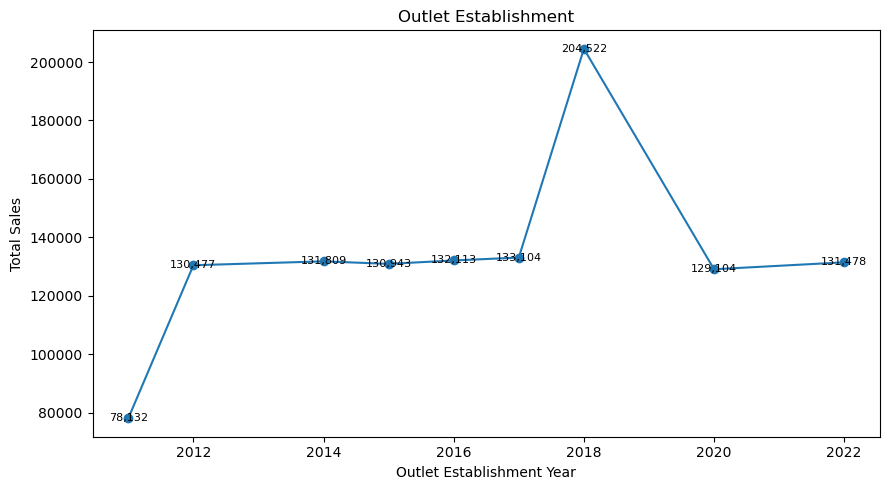

In [ ]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')

plt.xlabel("Outlet Establishment Year")
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='center', fontsize = 8)
    
plt.tight_layout()
plt.show()

##### **Sales by Outlet Size**

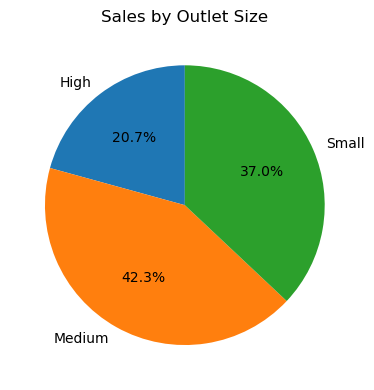

In [80]:
sales_by_size = df.groupby("Outlet Size")["Sales"].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels = sales_by_size.index,autopct="%1.1f%%",startangle=90)
plt.title("Sales by Outlet Size")
plt.tight_layout()
plt.show()

##### **Sales by Outlet Location**

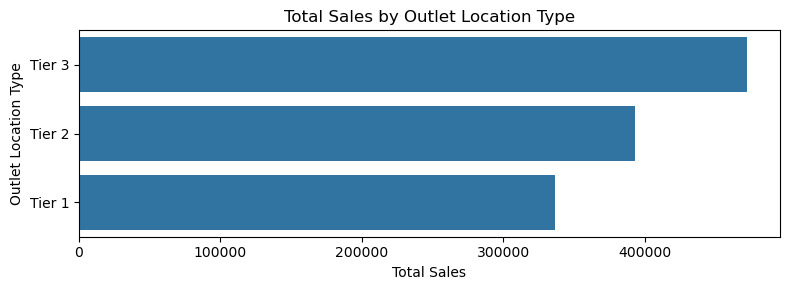

In [88]:
sales_by_location = df.groupby("Outlet Location Type")["Sales"].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(x='Sales',y='Outlet Location Type', data=sales_by_location)

plt.title("Total Sales by Outlet Location Type")
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()